# Homework 2

In [ ]:
import numpy as np
import sympy as sp 
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.close('all')
# %qtconsole

## Problem 3

In [2]:
# (a) Helper function cross_matrix(v)

def cross_matrix(v):
    vx = v[0].item()
    vy = v[1].item()
    vz = v[2].item()

    return np.array([[0,-vz,vy],
                     [vz,0,-vx,],
                     [-vy,vx,0]]);

In [22]:
# (b) Helper function uncross_matrix(V)

def uncross_matrix(V):
    vx = V[2,1]
    vy = V[0,2]
    vz = V[1,0]
    
    return np.array([[vx],
                     [vy],
                     [vz]]);

In [4]:
# (c) Dynamics function omega_dot(t, w, I_B)

def w_dot(t, w, I_B):
    return -(np.linalg.inv(I_B) @ (cross_matrix(w) @ I_B @ w.transpose())).transpose()


In [5]:
# Initial Conditions for integration

# Moment of Inertia - Body Frame
I_B = np.array([[10,0,0],
                [0,5,0],
                [0,0,1]])

# Initial Rotation 1 - Body Frame
w1_0 = np.array([0.9, 0.1, 0])

# Initial Rotation 2 - Body Frame
w2_0 = np.array([0.1, 0.9, 0])


In [6]:
# Running the integration
h = 0.01 # step size (1 ms)
tf = 10 # duration (1 s)
N = int(tf/h);
t = np.linspace(0,tf,N);

result1 = solve_ivp(w_dot, [0, 10], w1_0, args=([I_B]), t_eval=t)
result2 = solve_ivp(w_dot, [0, 10], w2_0, args=([I_B]), t_eval=t)


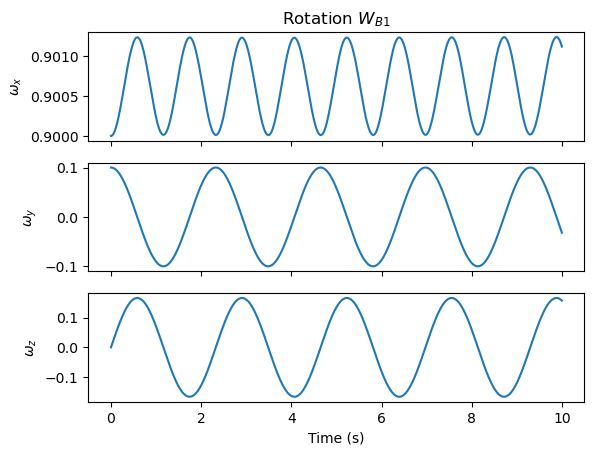

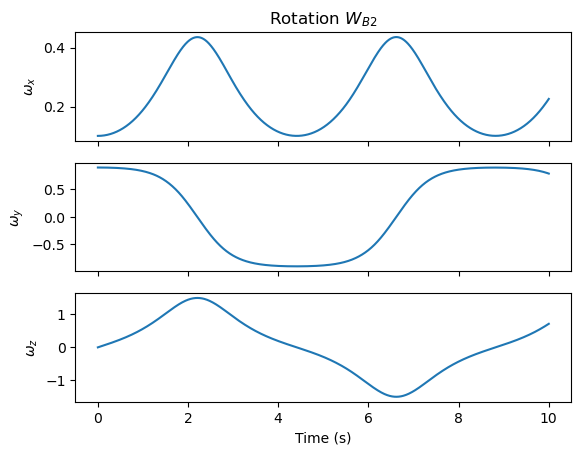

In [7]:
# Plotting
# %matplotlib qt

# Making a new figure with 3 subplots
fig1 = plt.figure()
ax1 = fig1.add_subplot(3,1,1)
plt.setp(ax1, xticklabels=[])
ax2 = fig1.add_subplot(3,1,2)
plt.setp(ax2, xticklabels=[])
ax3 = fig1.add_subplot(3,1,3)

# Plot w1
ax1.set_title(r"Rotation $W_{B1}$")
ax1.plot(result1.t,result1.y[0])
ax2.plot(result1.t,result1.y[1])
ax3.plot(result1.t,result1.y[2])
ax1.set_ylabel(r'$\omega_{x}$');
ax2.set_ylabel(r'$\omega_{y}$');
ax3.set_ylabel(r'$\omega_{z}$');
ax3.set_xlabel('Time (s)');


# Making a new figure with 3 subplots
fig2 = plt.figure()
ax1 = fig2.add_subplot(3,1,1)
plt.setp(ax1, xticklabels=[])
ax2 = fig2.add_subplot(3,1,2)
plt.setp(ax2, xticklabels=[])
ax3 = fig2.add_subplot(3,1,3)


# Plot w2
ax1.set_title(r"Rotation $W_{B2}$")
ax1.plot(result2.t,result2.y[0])
ax2.plot(result2.t,result2.y[1])
ax3.plot(result2.t,result2.y[2])
ax1.set_ylabel(r'$\omega_{x}$');
ax2.set_ylabel(r'$\omega_{y}$');
ax3.set_ylabel(r'$\omega_{z}$');
ax3.set_xlabel('Time (s)');


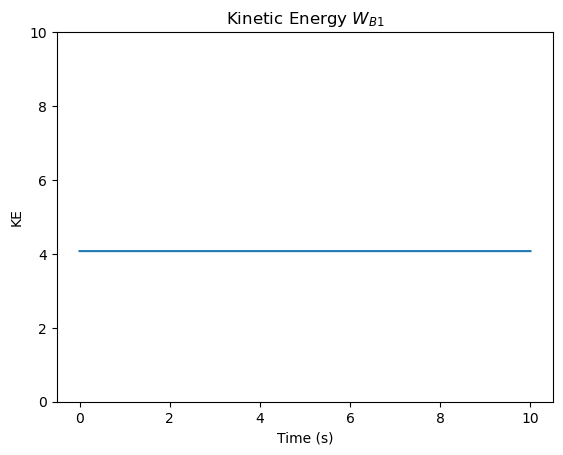

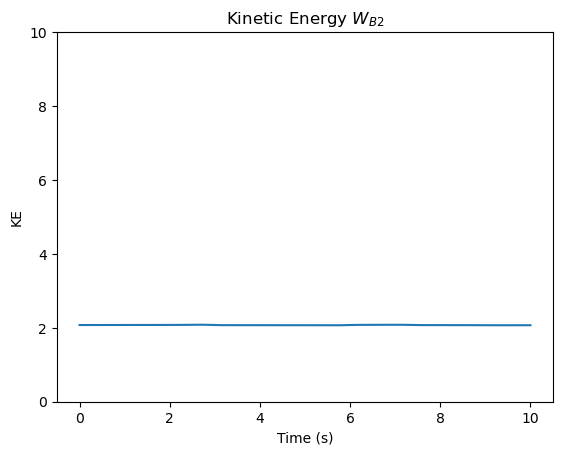

In [8]:
# (e) Kinetic Energy

KE1 = []
KE2 = []
for i in range(N):
    KE1.append((0.5 * result1.y[:,i] @ I_B @ result1.y[:,i].transpose()).item())
    KE2.append((0.5 * result2.y[:,i] @ I_B @ result2.y[:,i].transpose()).item())

fig3 = plt.figure()
ax = fig3.add_subplot()
ax.set_title(r"Kinetic Energy $W_{B1}$")
ax.plot(t,KE1)
ax.set_ylim(0,10);
ax.set_ylabel('KE');
ax.set_xlabel('Time (s)');


fig4 = plt.figure()
ax = fig4.add_subplot()
ax.set_title(r"Kinetic Energy $W_{B2}$")
ax.plot(t,KE2)
ax.set_ylim(0,10);
ax.set_ylabel('KE');
ax.set_xlabel('Time (s)');



# Problem 4

In [14]:
import sympy as sp
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi
from sympy import Matrix, diff

(t, alpha, gamma, beta) = symbols("""t, alpha(t), gamma(t), beta(t)""" , real = True)

theta = Function('theta', real=True)(t)
alpha = Function('alpha', real=True)(t)
beta = Function('beta', real=True)(t)
gamma = Function('gamma', real=True)(t)

def R_x(theta):
    return Matrix([[1,0,0],
                   [0,cos(theta), -sin(theta)], 
                   [0,sin(theta), cos(theta)]])

def R_y(theta):
    return Matrix([[cos(theta), 0, sin(theta)],
                                      [0, 1, 0],
                   [-sin(theta), 0, cos(theta)]])
def R_z(theta):
    return Matrix([[cos(theta), -sin(theta), 0], 
                   [sin(theta), cos(theta), 0],
                   [0, 0, 1]])


In [27]:
# (a) Multiply three rotations in the order of z-y-z
# Looks the same as the equation on page 5
R_zyx = R_z(gamma) @ R_y(beta) @ R_x(alpha)
R_zyx 

Matrix([
[cos(beta(t))*cos(gamma(t)), sin(alpha(t))*sin(beta(t))*cos(gamma(t)) - sin(gamma(t))*cos(alpha(t)),  sin(alpha(t))*sin(gamma(t)) + sin(beta(t))*cos(alpha(t))*cos(gamma(t))],
[sin(gamma(t))*cos(beta(t)), sin(alpha(t))*sin(beta(t))*sin(gamma(t)) + cos(alpha(t))*cos(gamma(t)), -sin(alpha(t))*cos(gamma(t)) + sin(beta(t))*sin(gamma(t))*cos(alpha(t))],
[             -sin(beta(t)),                                             sin(alpha(t))*cos(beta(t)),                                              cos(alpha(t))*cos(beta(t))]])

In [44]:
# Differentiate the z-y-x rotation matrix
dR_zyx = sp.simplify(diff(R_zyx, t))
# Convert anular velocity components to euler angle rates
# Left hand side of the equation
LHS = sp.simplify(dR_zyx @ R_zyx.transpose()) 
sp.simplify(uncross_matrix(LHS))

In [43]:
# Extract the vector (alpha_dot, beta_dot, gamma_dot)
A = simplify(Matrix([[cos(beta)*cos(gamma), -sin(gamma), 0],
       [sin(gamma)*cos(beta),cos(gamma),0],
       [-sin(alpha),0,1]]))
simplify(A.inv())

Matrix([
[              cos(gamma(t))/cos(beta(t)),               sin(gamma(t))/cos(beta(t)), 0],
[                          -sin(gamma(t)),                            cos(gamma(t)), 0],
[sin(alpha(t))*cos(gamma(t))/cos(beta(t)), sin(alpha(t))*sin(gamma(t))/cos(beta(t)), 1]])

In [45]:
# its close but not quite the same as equation 6....
LHS


Matrix([
[                                                                                         0,                             sin(beta(t))*Derivative(alpha(t), t) - Derivative(gamma(t), t), sin(gamma(t))*cos(beta(t))*Derivative(alpha(t), t) + cos(gamma(t))*Derivative(beta(t), t)],
[                           -sin(beta(t))*Derivative(alpha(t), t) + Derivative(gamma(t), t),                                                                                          0, sin(gamma(t))*Derivative(beta(t), t) - cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t)],
[-sin(gamma(t))*cos(beta(t))*Derivative(alpha(t), t) - cos(gamma(t))*Derivative(beta(t), t), -sin(gamma(t))*Derivative(beta(t), t) + cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t),                                                                                         0]])